<h1> Analysis of the free energy associated with bending a duplex DNA </h1>
<p> First, run the "do.run.sh" script, which will launch 6 oxDNA_metadynamics with 6 walkers. While this simulation is running, the system can be inspected with this analysis notebook.</p>

In [21]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

<h4> Plotting the length of the duplex over time </h4>
<p> Note that over longer time period, the duplex will appear to have higher variance in its length, as gradually the metadynamic bias forces the system to explore regions of configuration space further from the relaxed, rigid, structure </p> 

Text(0.5, 0, 'timesteps (x10,000)')

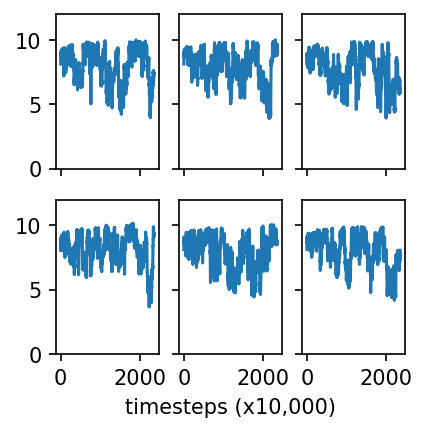

In [22]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

def load_all_positions(index):
    data = pd.read_csv(f'run-meta_{index}/pos.dat',header=None)
    return np.array(data).flatten()

positions = [load_all_positions(i) for i in range(6)]

f,ax = plt.subplots(2,3,figsize = (3,3),sharex = True,sharey=True)
for i,a in enumerate(ax.flatten()):
    x = np.array(positions[i]).flatten()[::10] * 0.85 # 0.85 to convert oxDNA units to nm
    a.plot(np.arange(len(x)),x) 
for a in ax.flatten(): 
    a.set_ylim(0,12)
ax[1][1].set_xlabel('timesteps (x10,000)')
# see oxDNA config files to establish we save the position every 10,000 timesteps

<h4> Plotting the convergence of the free energy implied by the metadynamic bias over time </h4>

Text(0, 0.5, 'free energy (k$_B$T)')

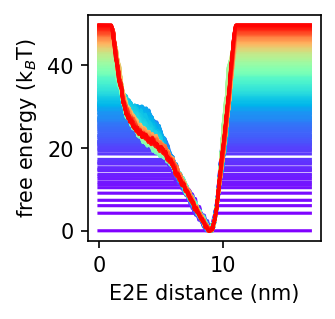

In [40]:
def load_bias(fname):
    return pkl.load(open("bias/"+fname,'rb'))

bias_files = os.listdir('bias/')
bias_dictionary = {int(x.split('_')[1]) : x for x in bias_files}
keys = np.sort(list(bias_dictionary.keys()))
biases = [load_bias(bias_dictionary[key]) for key in keys]

# the centers stores the metadynamic bias as a function of time
# in well-tempered metadynamics, the bias converges to a multiple of the free energy
f,ax = plt.subplots(1,1,figsize = (2,2),sharex = True,sharey=True)
from matplotlib.cm import rainbow
for index,i in enumerate(biases[::10]):
    c = i
    c = -c*21/20 
    # 21/20 because metadynamic Delta T is equal to 20T, and the relationship between converged metadynamic bias and free energy is:
    # free energy = (T + Delta T) / T
    # see, for example, Bussi et al. 2020
    c -= np.min(c) 
    # minimum of free energy is arbitrary
    plt.plot(np.arange(0,20.001,0.001)*0.85,c,color = rainbow(index/len(biases) * 10))
    # 0.85 is to convert from oxDNA units to nm
    # range of coordiantes is from the grid spacing, see these values in the run.sh script.

plt.xlabel('E2E distance (nm)')
plt.ylabel('free energy (k$_B$T)')

<h4>Plotting the last (current) bias and the reference one, obtained with a long-ish simulation (2500 iterations)</h4>

In [41]:
to_plot = -(biases[-1] - np.max(biases[-1]))
np.savetxt(to_plot, "fe.dat")
plt.plot(np.arange(0,20.001,0.001)*0.85,to_plot)

ValueError: fname must be a string or file handle